In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import seaborn as sns
df = sns.load_dataset('iris')
df
                      

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
X = df.iloc[:,:-1] #species is not our independent feture thats why -1
y= iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
88,5.6,3.0,4.1,1.3
123,6.3,2.7,4.9,1.8
136,6.3,3.4,5.6,2.4
16,5.4,3.9,1.3,0.4
46,5.1,3.8,1.6,0.2
...,...,...,...,...
138,6.0,3.0,4.8,1.8
8,4.4,2.9,1.4,0.2
49,5.0,3.3,1.4,0.2
125,7.2,3.2,6.0,1.8


In [18]:
from sklearn.tree import DecisionTreeClassifier


In [56]:
##Postpruning
model = DecisionTreeClassifier(max_depth=2)#max-depth is used in post-pruning

In [57]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.664\nsamples = 100\nvalue = [36, 29, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.496\nsamples = 64\nvalue = [0, 29, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.17\nsamples = 32\nvalue = [0, 29, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

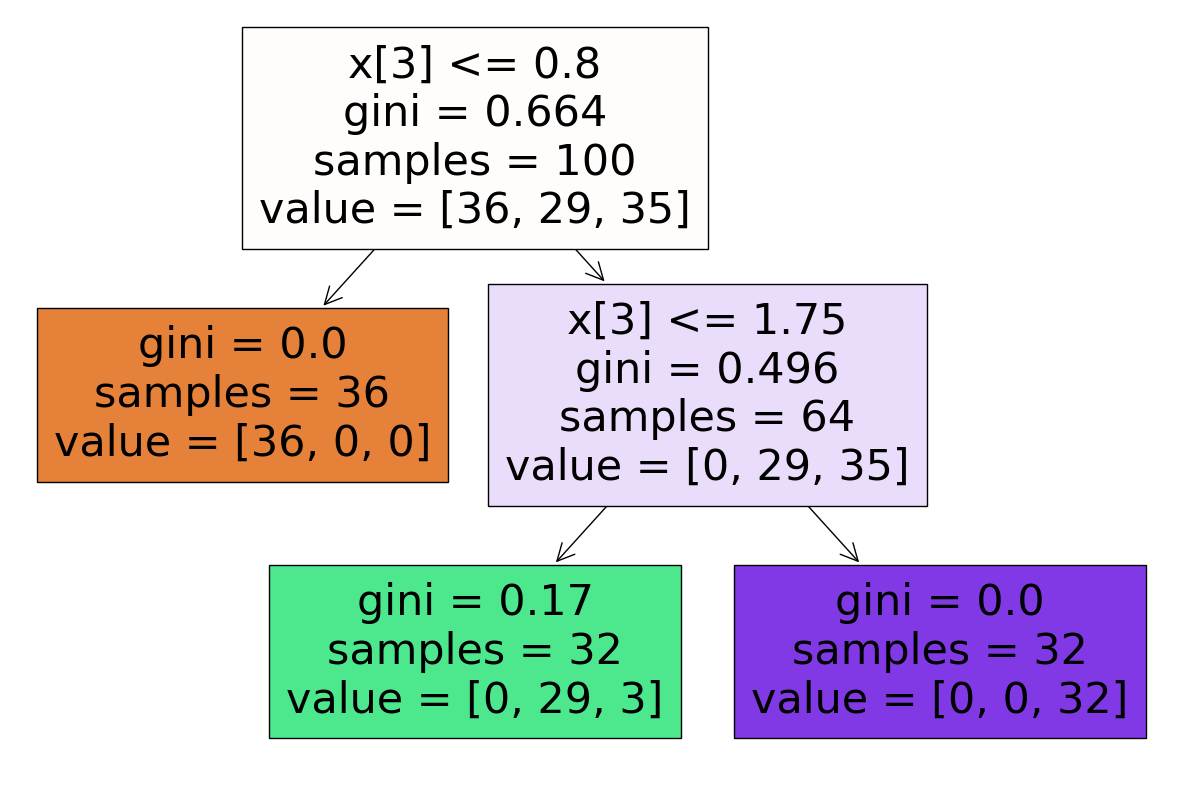

In [58]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,filled=True)

In [59]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1,
       0, 0, 0, 1, 2, 2])

In [60]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score



0.94

In [66]:
from sklearn.metrics import classification_report
results = classification_report(y_pred,y_test)
print(results)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      0.91      0.93        22
           2       0.87      0.93      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.94      0.94      0.94        50

